In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
total_train_ds = torchvision.datasets.FashionMNIST("./data", download=True,
transform=transforms.Compose([transforms.ToTensor()]))
total_train_len = len(total_train_ds)
train_ds_len = int(total_train_len * 0.7)
valid_ds_len = total_train_len - train_ds_len
train_ds, valid_ds = random_split(total_train_ds, [train_ds_len, valid_ds_len])
test_ds = torchvision.datasets.FashionMNIST("./data", download=True, train=False,
transform=transforms.Compose([transforms.ToTensor()])) 

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



torch.Size([128, 1, 28, 28])
42000
18000
10000


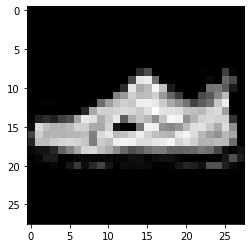

7


In [10]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size, drop_last=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, drop_last=True)
# Retrieve a batch from data loader
img = next(iter(train_dl))
print(img[0].size())
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))
image, label = next(iter(train_ds))
plt.imshow(image.squeeze(), cmap="gray")
plt.show()
print(label)

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8,\
                       kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3 , bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=8 * 6 * 6, out_features=128)
        self.drop = nn.Dropout(.25)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        return out

In [21]:
model = CNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=288, out_features=128, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# LSTM